In [534]:
import numpy as np
import pandas as pd
import datetime
import json 
df = pd.read_csv("subscribers.csv")
df_spend = pd.read_csv("channel_spend_graduate.csv")
df.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,2020-02-07 21:44:16,False,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,2019-12-21 16:37:06,False,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,2020-02-10 16:09:32,False,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


# Data preprocessing (age & account_creation_date)

In [535]:
#transform format of account_creation_date to datetime 
df['account_creation_date'] = pd.to_datetime(df['account_creation_date'])
df['month_year'] = df['account_creation_date'].dt.to_period('M')
df['month_year'].value_counts()

2020-02    28089
2019-11    26828
2020-03    26122
2019-07    25708
2019-08    25434
2019-12    25339
2020-01    24843
2019-10    22412
2019-09    20190
2019-06     2663
Freq: M, Name: month_year, dtype: int64

In [536]:
#Assume those ages between 1920-2020 to be the year of birth, so calculate the age by subtracting the number with 2020.
#After the processing above, take the absolute value of the data and only keep the data with age between 0-100
df.age=df['age'].abs()
df.age=df['age'].round()
df['age'] = df['age'].apply(lambda x: (2020-x) if  1920<=  x <= 2020 else x)
df_age=df[df['age']<100 ]
df_age=df_age[df_age['age']>0 ]

In [203]:
# Group the ages by every ten years and dummy the variable
df_age['0-10'] = 0
df_age['10-20']=0
df_age['20-30']=0
df_age['30-40']=0
df_age['40-50']=0
df_age['50-60']=0
df_age['60-70']=0
df_age['70-80']=0
df_age['80-90']=0
df_age['90-100']=0

for index,row in df_age.iterrows():
    if 0<=row['age'] <10:
        df_age.at[index, '0-10'] = 1
    elif 10<=row['age'] <20:
        df_age.at[index, '10-20'] = 1
    elif 20<=row['age'] <30:
        df_age.at[index, '20-30'] = 1
    elif 30<=row['age'] <40:
        df_age.at[index, '30-40'] = 1
    elif 40<=row['age'] <50:
        df_age.at[index, '40-50'] = 1
    elif 50<=row['age'] <60:
        df_age.at[index, '50-60'] = 1
    elif 60<=row['age'] <70:
        df_age.at[index, '60-70'] = 1
    elif 70<=row['age'] <80:
        df_age.at[index, '70-80'] = 1
    elif 80<=row['age'] <90:
        df_age.at[index, '80-90'] = 1
    elif 90<=row['age'] <100:
        df_age.at[index, '90-100'] = 1        

df_age

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0,0,0,0,0,0,0,1,0,0
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0,0,1,0,0,0,0,0,0,0
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0,0,0,1,0,0,0,0,0,0
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0,0,1,0,0,0,0,0,0,0
5,284782,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,70.0,False,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,603751,25835684,base,2.0,drama,access to exclusive content,24.401536,2.0,43.0,False,...,0,0,0,0,1,0,0,0,0,0
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,...,0,0,0,1,0,0,0,0,0,0
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,...,0,0,0,0,1,0,0,0,0,0
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,...,0,0,0,0,1,0,0,0,0,0


# Data Visualization

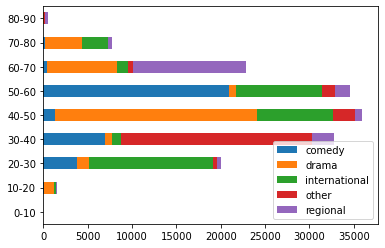

In [168]:
#preferred_genre for people in different ages
o1 = df_age[df_age["0-10"]==1]

x={'0-10':{'comedy':o1.preferred_genre[o1['preferred_genre']=='comedy'].count(),'drama':o1.preferred_genre[o1['preferred_genre']=='drama'].count(),'regional':o1.preferred_genre[o1['preferred_genre']=='regional'].count(), 'international':o1.preferred_genre[o1['preferred_genre']=='international'].count(),'other':o1.preferred_genre[o1['preferred_genre']=='other'].count()}}

d=DataFrame(x)
o2=df_age[df_age["10-20"]==1]
o3=df_age[df_age["20-30"]==1]
o4=df_age[df_age["30-40"]==1]
o5=df_age[df_age["40-50"]==1]
o6=df_age[df_age["50-60"]==1]
o7=df_age[df_age["60-70"]==1]
o8=df_age[df_age["70-80"]==1]
o9=df_age[df_age["80-90"]==1]
o10=df_age[df_age["90-100"]==1]


d['10-20']={o2.preferred_genre[o2['preferred_genre']=='comedy'].count(),o2.preferred_genre[o2['preferred_genre']=='drama'].count(),o2.preferred_genre[o2['preferred_genre']=='regional'].count(),o2.preferred_genre[o2['preferred_genre']=='international'].count(),o2.preferred_genre[o2['preferred_genre']=='other'].count()}
d['20-30']={o3.preferred_genre[o3['preferred_genre']=='comedy'].count(),o3.preferred_genre[o3['preferred_genre']=='drama'].count(),o3.preferred_genre[o3['preferred_genre']=='regional'].count(),o3.preferred_genre[o3['preferred_genre']=='international'].count(),o3.preferred_genre[o3['preferred_genre']=='other'].count()}
d['30-40']={o4.preferred_genre[o4['preferred_genre']=='comedy'].count(),o4.preferred_genre[o4['preferred_genre']=='drama'].count(),o4.preferred_genre[o4['preferred_genre']=='regional'].count(),o4.preferred_genre[o4['preferred_genre']=='international'].count(),o4.preferred_genre[o4['preferred_genre']=='other'].count()}
d['40-50']={o5.preferred_genre[o5['preferred_genre']=='comedy'].count(),o5.preferred_genre[o5['preferred_genre']=='drama'].count(),o5.preferred_genre[o5['preferred_genre']=='regional'].count(),o5.preferred_genre[o5['preferred_genre']=='international'].count(),o5.preferred_genre[o5['preferred_genre']=='other'].count()}
d['50-60']={o6.preferred_genre[o6['preferred_genre']=='comedy'].count(),o6.preferred_genre[o6['preferred_genre']=='drama'].count(),o6.preferred_genre[o6['preferred_genre']=='regional'].count(),o6.preferred_genre[o6['preferred_genre']=='international'].count(),o6.preferred_genre[o6['preferred_genre']=='other'].count()}
d['60-70']={o7.preferred_genre[o7['preferred_genre']=='comedy'].count(),o7.preferred_genre[o7['preferred_genre']=='drama'].count(),o7.preferred_genre[o7['preferred_genre']=='regional'].count(),o7.preferred_genre[o7['preferred_genre']=='international'].count(),o7.preferred_genre[o7['preferred_genre']=='other'].count()}
d['70-80']={o8.preferred_genre[o8['preferred_genre']=='comedy'].count(),o8.preferred_genre[o8['preferred_genre']=='drama'].count(),o8.preferred_genre[o8['preferred_genre']=='regional'].count(),o8.preferred_genre[o8['preferred_genre']=='international'].count(),o8.preferred_genre[o8['preferred_genre']=='other'].count()}
d['80-90']={o9.preferred_genre[o9['preferred_genre']=='comedy'].count(),o9.preferred_genre[o9['preferred_genre']=='drama'].count(),o9.preferred_genre[o9['preferred_genre']=='regional'].count(),o9.preferred_genre[o9['preferred_genre']=='international'].count(),o9.preferred_genre[o9['preferred_genre']=='other'].count()}
#d['90-100']={o10.preferred_genre[o10['preferred_genre']=='comedy'].count(),o10.preferred_genre[o10['preferred_genre']=='drama'].count(),o10.preferred_genre[o10['preferred_genre']=='regional'].count(),o10.preferred_genre[o10['preferred_genre']=='international'].count(),o10.preferred_genre[o10['preferred_genre']=='other'].count()}
d=d.transpose()
d.plot(kind='barh',stacked=True)

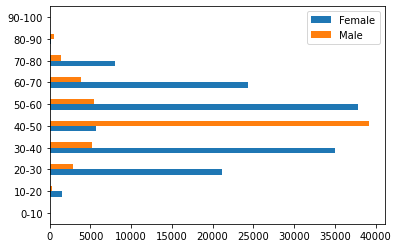

In [171]:
#gender distribution for people in different ages
o1 = df_age[df_age["0-10"]==1]

x={'0-10':{'Male':o1.male_TF[o1['male_TF']==True].count(),'Female':o1.male_TF[o1['male_TF']==False].count()}}
d=DataFrame(x)
o2=df_age[df_age["10-20"]==1]
o3=df_age[df_age["20-30"]==1]
o4=df_age[df_age["30-40"]==1]
o5=df_age[df_age["40-50"]==1]
o6=df_age[df_age["50-60"]==1]
o7=df_age[df_age["60-70"]==1]
o8=df_age[df_age["70-80"]==1]
o9=df_age[df_age["80-90"]==1]
o10=df_age[df_age["90-100"]==1]


d['10-20']={o2.male_TF[o2['male_TF']==True].count(),o2.male_TF[o2['male_TF']==False].count()}
d['20-30']={o3.male_TF[o3['male_TF']==True].count(),o3.male_TF[o3['male_TF']==False].count()}
d['30-40']={o4.male_TF[o4['male_TF']==True].count(),o4.male_TF[o4['male_TF']==False].count()}
d['40-50']={o5.male_TF[o5['male_TF']==True].count(),o5.male_TF[o5['male_TF']==False].count()}
d['50-60']={o6.male_TF[o6['male_TF']==True].count(),o6.male_TF[o6['male_TF']==False].count()}
d['60-70']={o7.male_TF[o7['male_TF']==True].count(),o7.male_TF[o7['male_TF']==False].count()}
d['70-80']={o8.male_TF[o8['male_TF']==True].count(),o8.male_TF[o8['male_TF']==False].count()}
d['80-90']={o9.male_TF[o9['male_TF']==True].count(),o9.male_TF[o9['male_TF']==False].count()}
d['90-100']={o10.male_TF[o10['male_TF']==True].count(),o10.male_TF[o10['male_TF']==False].count()}
d=d.transpose()
d.plot(kind='barh')

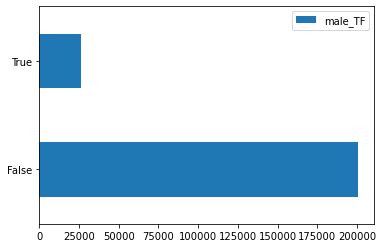

In [79]:
# gender comparison for all people 
df3 = pd.DataFrame(df['male_TF'].value_counts())

df3.plot.barh()

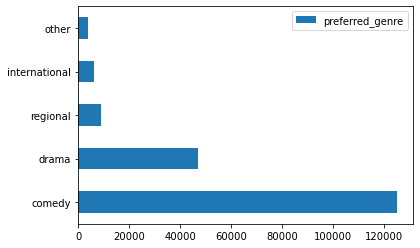

In [82]:
#preferred_genre distribution for all the people 
df3 = pd.DataFrame(df['preferred_genre'].value_counts())

df3.plot.barh()


In [36]:
#user converted each month
df2 = pd.DataFrame(df['month_year'].value_counts())
df2.sort_index(inplace=True)
df2

,month_year
2020-02,28089
2019-11,26828
2020-03,26122
2019-07,25708
2019-08,25434
2019-12,25339
2020-01,24843
2019-10,22412
2019-09,20190
2019-06,2663


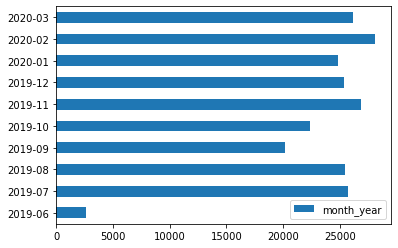

In [42]:
df2.plot.barh()

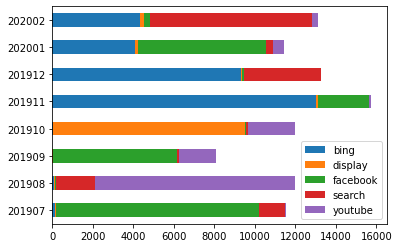

In [197]:
# user converted from different channels of different months use last interaction model
o1 = df[df["month_year"]=='2019-07']

from pandas import Series,DataFrame
x={'201907':{'bing':o1.attribution_technical[o1['attribution_technical']=='bing'].count(),'facebook':o1.attribution_technical[o1['attribution_technical']=='facebook'].count(),'search':o1.attribution_technical[o1['attribution_technical']=='search'].count(), 'display':o1.attribution_technical[o1['attribution_technical']=='display'].count(),'youtube':o1.attribution_technical[o1['attribution_technical']=='youtube'].count()}}
d=DataFrame(x)
o2=df[df["month_year"]=='201908']
o3=df[df["month_year"]=='201909']
o4=df[df["month_year"]=='201910']
o5=df[df["month_year"]=='201911']
o6=df[df["month_year"]=='201912']
o7=df[df["month_year"]=='202001']
o8=df[df["month_year"]=='202002']
d['201908']={o2.attribution_technical[o2['attribution_technical']=='bing'].count(),o2.attribution_technical[o2['attribution_technical']=='facebook'].count(),o2.attribution_technical[o2['attribution_technical']=='search'].count(), o2.attribution_technical[o2['attribution_technical']=='display'].count(),o2.attribution_technical[o2['attribution_technical']=='youtube'].count()}
d['201909']={o3.attribution_technical[o3['attribution_technical']=='bing'].count(),o3.attribution_technical[o3['attribution_technical']=='facebook'].count(),o3.attribution_technical[o3['attribution_technical']=='search'].count(), o3.attribution_technical[o3['attribution_technical']=='display'].count(),o3.attribution_technical[o3['attribution_technical']=='youtube'].count()}
d['201910']={o4.attribution_technical[o4['attribution_technical']=='bing'].count(),o4.attribution_technical[o4['attribution_technical']=='facebook'].count(),o4.attribution_technical[o4['attribution_technical']=='search'].count(), o4.attribution_technical[o4['attribution_technical']=='display'].count(),o4.attribution_technical[o4['attribution_technical']=='youtube'].count()}
d['201911']={o5.attribution_technical[o5['attribution_technical']=='bing'].count(),o5.attribution_technical[o5['attribution_technical']=='facebook'].count(),o5.attribution_technical[o5['attribution_technical']=='search'].count(), o5.attribution_technical[o5['attribution_technical']=='display'].count(),o5.attribution_technical[o5['attribution_technical']=='youtube'].count()}
d['201912']={o6.attribution_technical[o6['attribution_technical']=='bing'].count(),o6.attribution_technical[o6['attribution_technical']=='facebook'].count(),o6.attribution_technical[o6['attribution_technical']=='search'].count(), o6.attribution_technical[o6['attribution_technical']=='display'].count(),o6.attribution_technical[o6['attribution_technical']=='youtube'].count()}
d['202001']={o7.attribution_technical[o7['attribution_technical']=='bing'].count(),o7.attribution_technical[o7['attribution_technical']=='facebook'].count(),o7.attribution_technical[o7['attribution_technical']=='search'].count(), o7.attribution_technical[o7['attribution_technical']=='display'].count(),o7.attribution_technical[o7['attribution_technical']=='youtube'].count()}
d['202002']={o8.attribution_technical[o8['attribution_technical']=='bing'].count(),o8.attribution_technical[o8['attribution_technical']=='facebook'].count(),o8.attribution_technical[o8['attribution_technical']=='search'].count(), o8.attribution_technical[o8['attribution_technical']=='display'].count(),o8.attribution_technical[o8['attribution_technical']=='youtube'].count()}
d=d.transpose()
d.plot(kind='barh', stacked=True)



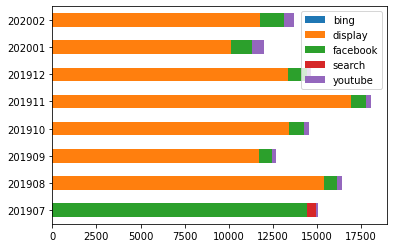

In [261]:
# user converted from different channels of different months use first interaction model
o1 = df[df["month_year"]=='2019-07']
x={'201907':{'bing':o1.attribution_survey[o1['attribution_survey']=='bing'].count(),'facebook':o1.attribution_survey[o1['attribution_survey']=='facebook'].count(),'search':o1.attribution_survey[o1['attribution_survey']=='search'].count(), 'display':o1.attribution_survey[o1['attribution_survey']=='display'].count(),'youtube':o1.attribution_survey[o1['attribution_survey']=='youtube'].count()}}
d=DataFrame(x)
o2=df[df["month_year"]=='201908']
o3=df[df["month_year"]=='201909']
o4=df[df["month_year"]=='201910']
o5=df[df["month_year"]=='201911']
o6=df[df["month_year"]=='201912']
o7=df[df["month_year"]=='202001']
o8=df[df["month_year"]=='202002']
d['201908']=[o2.attribution_survey[o2['attribution_survey']=='bing'].count(),o2.attribution_survey[o2['attribution_survey']=='facebook'].count(),o2.attribution_survey[o2['attribution_survey']=='search'].count(), o2.attribution_survey[o2['attribution_survey']=='display'].count(),o2.attribution_survey[o2['attribution_survey']=='youtube'].count()]
d['201909']=[o3.attribution_survey[o3['attribution_survey']=='bing'].count(),o3.attribution_survey[o3['attribution_survey']=='facebook'].count(),o3.attribution_survey[o3['attribution_survey']=='search'].count(), o3.attribution_survey[o3['attribution_survey']=='display'].count(),o3.attribution_survey[o3['attribution_survey']=='youtube'].count()]
d['201910']=[o4.attribution_survey[o4['attribution_survey']=='bing'].count(),o4.attribution_survey[o4['attribution_survey']=='facebook'].count(),o4.attribution_survey[o4['attribution_survey']=='search'].count(), o4.attribution_survey[o4['attribution_survey']=='display'].count(),o4.attribution_survey[o4['attribution_survey']=='youtube'].count()]
d['201911']=[o5.attribution_survey[o5['attribution_survey']=='bing'].count(),o5.attribution_survey[o5['attribution_survey']=='facebook'].count(),o5.attribution_survey[o5['attribution_survey']=='search'].count(), o5.attribution_survey[o5['attribution_survey']=='display'].count(),o5.attribution_survey[o5['attribution_survey']=='youtube'].count()]
d['201912']=[o6.attribution_survey[o6['attribution_survey']=='bing'].count(),o6.attribution_survey[o6['attribution_survey']=='facebook'].count(),o6.attribution_survey[o6['attribution_survey']=='search'].count(), o6.attribution_survey[o6['attribution_survey']=='display'].count(),o6.attribution_survey[o6['attribution_survey']=='youtube'].count()]
d['202001']=[o7.attribution_survey[o7['attribution_survey']=='bing'].count(),o7.attribution_survey[o7['attribution_survey']=='facebook'].count(),o7.attribution_survey[o7['attribution_survey']=='search'].count(), o7.attribution_survey[o7['attribution_survey']=='display'].count(),o7.attribution_survey[o7['attribution_survey']=='youtube'].count()]
d['202002']=[o8.attribution_survey[o8['attribution_survey']=='bing'].count(),o8.attribution_survey[o8['attribution_survey']=='facebook'].count(),o8.attribution_survey[o8['attribution_survey']=='search'].count(), o8.attribution_survey[o8['attribution_survey']=='display'].count(),o8.attribution_survey[o8['attribution_survey']=='youtube'].count()
d=d.transpose()
d.plot(kind='barh', stacked=True)


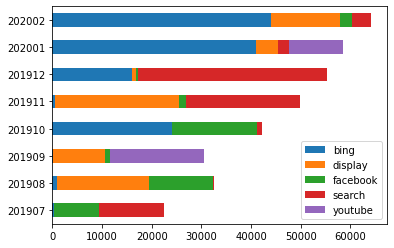

In [195]:
# spend on different channels of different months 
o1 = df_spend[df_spend["date"]==201907]
x={'201907':{'bing':o1.spend_AED[o1.channel=='bing'].sum(),'facebook':o1.spend_AED[o1.channel=='facebook'].sum(),'search':o1.spend_AED[o1.channel=='search'].sum(), 'display':o1.spend_AED[o1.channel=='display'].sum(),'youtube':o1.spend_AED[o1.channel=='youtube'].sum()}}
d=DataFrame(x)
o2=df_spend[df_spend["date"]==201908]
o3=df_spend[df_spend["date"]==201909]
o4=df_spend[df_spend["date"]==201910]
o5=df_spend[df_spend["date"]==201911]
o6=df_spend[df_spend["date"]==201912]
o7=df_spend[df_spend["date"]==202001]
o8=df_spend[df_spend["date"]==202002]
d['201908']={o2.spend_AED[o2.channel=='bing'].sum(),o2.spend_AED[o2.channel=='facebook'].sum(),o2.spend_AED[o2.channel=='search'].sum(), o2.spend_AED[o2.channel=='display'].sum(),o2.spend_AED[o2.channel=='youtube'].sum()}
d['201909']={o3.spend_AED[o3.channel=='bing'].sum(),o3.spend_AED[o3.channel=='facebook'].sum(),o3.spend_AED[o3.channel=='search'].sum(), o3.spend_AED[o3.channel=='display'].sum(),o3.spend_AED[o3.channel=='youtube'].sum()}
d['201910']={o4.spend_AED[o4.channel=='bing'].sum(),o4.spend_AED[o4.channel=='facebook'].sum(),o4.spend_AED[o4.channel=='search'].sum(), o4.spend_AED[o4.channel=='display'].sum(),o4.spend_AED[o4.channel=='youtube'].sum()}
d['201911']={o5.spend_AED[o5.channel=='bing'].sum(),o5.spend_AED[o5.channel=='facebook'].sum(),o5.spend_AED[o5.channel=='search'].sum(), o5.spend_AED[o5.channel=='display'].sum(),o5.spend_AED[o5.channel=='youtube'].sum()}
d['201912']={o6.spend_AED[o6.channel=='bing'].sum(),o6.spend_AED[o6.channel=='facebook'].sum(),o6.spend_AED[o6.channel=='search'].sum(), o6.spend_AED[o6.channel=='display'].sum(),o6.spend_AED[o6.channel=='youtube'].sum()}
d['202001']={o7.spend_AED[o7.channel=='bing'].sum(),o7.spend_AED[o7.channel=='facebook'].sum(),o7.spend_AED[o7.channel=='search'].sum(), o7.spend_AED[o7.channel=='display'].sum(),o7.spend_AED[o7.channel=='youtube'].sum()}
d['202002']={o8.spend_AED[o8.channel=='bing'].sum(),o8.spend_AED[o8.channel=='facebook'].sum(),o8.spend_AED[o8.channel=='search'].sum(), o8.spend_AED[o8.channel=='display'].sum(),o8.spend_AED[o8.channel=='youtube'].sum()}
d=d.transpose()
d.plot(kind='barh', stacked=True)

# Customer segmentation

In [585]:
df_seg = df_age[["package_type",'attribution_survey','op_sys', 'preferred_genre','intended_use', 'weekly_consumption_hour', 'age', 'male_TF','current_sub_TF','payment_period',"plan_type",'join_fee']]
df_seg=df_seg.dropna()

In [586]:
#create dummy variable for objective variables

package_type=pd.get_dummies(df_seg["package_type"])
preferred_genre=pd.get_dummies(df_seg["preferred_genre"])
intended_use=pd.get_dummies(df_seg["intended_use"])
attribution_survey=pd.get_dummies(df_seg["attribution_survey"])
op_sys=pd.get_dummies(df_seg["op_sys"])
plan_type=pd.get_dummies(df_seg["plan_type"])
payment_period=pd.get_dummies(df_seg["payment_period"])

In [590]:
data=pd.concat([df_seg,package_type,preferred_genre,intended_use,attribution_survey,op_sys,plan_type,payment_period],axis=1)
data=data.drop(columns=['package_type', 'preferred_genre','intended_use',"attribution_survey","op_sys",'plan_type','payment_period'])
data['male_TF'] = data['male_TF'].apply(lambda x: 1 if x == True else 0)
data['current_sub_TF'] = data['current_sub_TF'].apply(lambda x: 1 if x == True else 0)


In [592]:
from sklearn import preprocessing

x = data.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data2=pd.DataFrame(x_scaled)

In [593]:
data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.626667,0.244898,1.0,0.0,0.413793,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.480000,0.295918,0.0,0.0,0.344828,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.506667,0.275510,0.0,1.0,0.344828,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.480000,0.612245,0.0,1.0,0.620690,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.613333,0.224490,0.0,1.0,0.310345,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144009,0.520000,0.428571,0.0,1.0,0.310345,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144010,0.560000,0.377551,0.0,1.0,0.620690,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144011,0.546667,0.489796,0.0,1.0,0.620690,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144012,0.586667,0.448980,0.0,1.0,0.344828,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


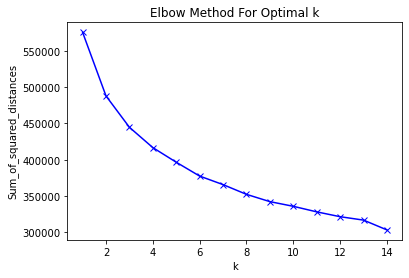

In [580]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data2)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [594]:
kmeans = KMeans(n_clusters = 3, random_state=0).fit(data2)
result = pd.DataFrame(kmeans.cluster_centers_,columns=list(data.columns))
pd.set_option('display.max_columns', None)
result


,weekly_consumption_hour,age,male_TF,current_sub_TF,join_fee,base,economy,enhanced,comedy,drama,international,other,regional,access to exclusive content,education,expand international access,expand regional access,other,replace OTT,supplement OTT,affiliate,amfm_radio,direct_mail,facebook,facebook_organic,other,ott,pinterest,podcast,public_radio,referral,search,sirius xm,social_organic,tv,youtube,Android,iOS,base_eur_14_day_trial,base_uae_14_day_trial,high_aud_14_day_trial,high_sar_14_day_trial,high_uae_14_day_trial,low_gbp_14_day_trial,0,1,2,3
0,0.547748,0.499986,0.158197,0.061019,0.447805,0.574599,0.163063,0.262338,0.445048,0.383643,0.048477,0.049271,0.073561,0.242365,0.000448,0.001018,0.001283,0.042756,0.633846,0.078284,0.007330,0.001568,0.001425,0.555440,0.003543,0.021643,0.004377,0.022274,0.010017,0.026101,0.021276,0.030581,0.004927,0.012705,0.267204,0.009590,3.404186e-01,6.595814e-01,0.000020,0.997740,2.035996e-05,6.107989e-05,0.002117,4.071993e-05,0.995439,0.004479,0.000081,-9.367507e-17
1,0.556337,0.436716,0.126821,0.946689,0.428193,0.572566,0.068998,0.358436,0.706758,0.202365,0.037919,0.013062,0.039895,0.565460,0.000442,0.000885,0.000944,0.028749,0.213009,0.190511,0.009760,0.002329,0.001740,0.453972,0.004334,0.041812,0.011736,0.047149,0.014743,0.034558,0.118683,0.056761,0.006605,0.020817,0.147845,0.027157,1.000000e+00,8.237855e-14,0.000029,0.997965,2.948635e-05,5.897270e-05,0.001917,2.598697e-18,0.050304,0.628354,0.319838,1.503804e-03
2,0.556849,0.428767,0.121015,0.951315,0.429295,0.530664,0.057753,0.411583,0.741244,0.169339,0.027319,0.012118,0.049980,0.547324,0.000180,0.000885,0.000771,0.025990,0.242178,0.182671,0.012249,0.002328,0.002738,0.432458,0.005920,0.039519,0.012315,0.049652,0.027548,0.039404,0.146547,0.054293,0.008707,0.027696,0.117572,0.021055,-8.065770e-14,1.000000e+00,0.000082,0.997868,2.546181e-18,-3.957338e-18,0.002017,3.279549e-05,0.029811,0.663879,0.304637,1.672570e-03


In [595]:
labels=kmeans.labels_
data['Cluster']=labels
data['Cluster'].value_counts()

2    60988
0    49092
1    33934
Name: Cluster, dtype: int64

In [600]:
60988/(60988+49092+33934)

0.42348660546891276

In [596]:
cluster0=data[data['Cluster']==0]
cluster1=data[data['Cluster']==1]
cluster2=data[data['Cluster']==2]

In [597]:
c0=pd.DataFrame(cluster0.mean()).transpose()
c1=pd.DataFrame(cluster1.mean()).transpose()
c2=pd.DataFrame(cluster2.mean()).transpose()
pd.concat([c0,c1,c2])

,weekly_consumption_hour,age,male_TF,current_sub_TF,join_fee,base,economy,enhanced,comedy,drama,international,other,regional,access to exclusive content,education,expand international access,expand regional access,other,replace OTT,supplement OTT,affiliate,amfm_radio,direct_mail,facebook,facebook_organic,other,ott,pinterest,podcast,public_radio,referral,search,sirius xm,social_organic,tv,youtube,Android,iOS,base_eur_14_day_trial,base_uae_14_day_trial,high_aud_14_day_trial,high_sar_14_day_trial,high_uae_14_day_trial,low_gbp_14_day_trial,0,1,2,3,Cluster
0,27.418226,50.000652,0.158132,0.060560,0.146269,0.574513,0.163082,0.262405,0.444899,0.383790,0.048440,0.049295,0.073576,0.242422,0.000448,0.001018,0.001283,0.042777,0.633912,0.078139,0.007333,0.001568,0.001426,0.555610,0.003524,0.021592,0.004380,0.022285,0.009981,0.026094,0.021327,0.030535,0.004889,0.012690,0.267192,0.009574,0.340178,0.659822,0.000020,0.997739,0.000020,0.000061,0.002118,0.000041,0.995417,0.004502,0.000081,0.000000,0.0
0,28.353488,43.796487,0.126952,0.946691,0.125456,0.572641,0.069016,0.358343,0.706784,0.202334,0.037956,0.013055,0.039872,0.565156,0.000442,0.000884,0.000943,0.028732,0.213296,0.190546,0.009754,0.002328,0.001739,0.453852,0.004361,0.041846,0.011729,0.047121,0.014793,0.034567,0.118613,0.056816,0.006631,0.020835,0.147846,0.027170,1.000000,0.000000,0.000029,0.997967,0.000029,0.000059,0.001915,0.000000,0.050863,0.627984,0.319650,0.001503,1.0
0,28.408712,43.020988,0.121007,0.951335,0.126613,0.530695,0.057765,0.411540,0.741244,0.169312,0.027333,0.012117,0.049993,0.547321,0.000180,0.000885,0.000771,0.025989,0.242130,0.182724,0.012248,0.002328,0.002738,0.432429,0.005919,0.039532,0.012314,0.049649,0.027546,0.039401,0.146504,0.054289,0.008723,0.027694,0.117630,0.021053,0.000000,1.000000,0.000082,0.997868,0.000000,0.000000,0.002017,0.000033,0.029891,0.663819,0.304617,0.001672,2.0


# Attribution and Allocation 

In [218]:
# split dataset into subset by month
m1=df[df["month_year"]=='2019-07']
m2=df[df["month_year"]=='2019-08']
m3=df[df["month_year"]=='2019-09']
m4=df[df["month_year"]=='2019-10']
m5=df[df["month_year"]=='2019-11']
m6=df[df["month_year"]=='2019-12']
m7=df[df["month_year"]=='2020-01']
m8=df[df["month_year"]=='2020-02']


In [441]:
#a function to calculate average CAC for each month and each channel
def number_cal_last(l,df):
    
    month_l=[]
    for i in range(0,len(l)):
        channel_l=[]
        channel_l.append(df.iloc[(0+i*5),2]/len(l[i][l[i]['attribution_technical']== 'bing']))
        channel_l.append(df.iloc[(1+i*5),2]/len(l[i][l[i]['attribution_technical']== 'display']))
        channel_l.append(df.iloc[(2+i*5),2]/len(l[i][l[i]['attribution_technical']== 'facebook']))
        channel_l.append(df.iloc[(3+i*5),2]/len(l[i][l[i]['attribution_technical']== 'search']))
        channel_l.append(df.iloc[(4+i*5),2]/len(l[i][l[i]['attribution_technical']== 'youtube']))
        month_l.append(channel_l)
    
    d=pd.DataFrame(month_l,columns=['bing','display','facebook','search','youtube'])

    return d
    
    
number_cal_last([m1,m2,m3,m4,m5,m6,m7,m8],df_spend)

,bing,display,facebook,search,youtube
0,3.333333,0.272727,0.899011,9.789157,11.250000
1,12.676056,0.270270,1.319127,9.541001,12.000000
2,11.904762,1.083333,1.713167,10.259179,50.000000
3,12.790698,0.380000,1.791548,10.287184,11.818182
4,12.621359,0.322222,1.769912,9.960159,11.702128
5,10.714286,0.276786,1.722653,10.079576,11.842105
6,12.209302,0.276119,1.749086,10.066290,11.783784
7,12.211221,0.275660,1.752629,10.232558,11.804878


In [495]:
#marginal CAC
def number_converted(l):
    
    month_l=[]
    for i in range(0,len(l)):
        channel_l=[]
        channel_l.append(len(l[i][l[i]['attribution_technical']== 'bing']))
        channel_l.append(len(l[i][l[i]['attribution_technical']== 'display']))
        channel_l.append(len(l[i][l[i]['attribution_technical']== 'facebook']))
        channel_l.append(len(l[i][l[i]['attribution_technical']== 'search']))
        channel_l.append(len(l[i][l[i]['attribution_technical']== 'youtube']))
        month_l.append(channel_l)
    
    d=pd.DataFrame(month_l,columns=['bing','display','facebook','search','youtube'])

    return d
    
    
converted_user=number_converted([m1,m2,m3,m4,m5,m6,m7,m8])

In [497]:
converted_user

,bing,display,facebook,search,youtube
0,120,44,10011,1328,8
1,71,74,9855,1939,15
2,84,12,6129,1852,2
3,86,50,9489,2333,11
4,103,90,12995,2510,47
5,28,112,9288,3770,76
6,172,536,6289,4073,370
7,303,341,7988,4300,205


In [501]:
def MC(df_spend, df2):
    l=[]
    for i in range(0, len(df_spend)):
        l.append(df2.iloc[i//5,i%5])
    df_spend['converted']=l

    return df_spend
    
df_spend2=df_spend
mc_all=MC(df_spend2,converted_user)

In [602]:
def Mc_calculator(df):
    l=[]
    for i in range(0,len(df)):
        if i==0:
            l.append(df.iloc[i,2]/df.iloc[i,3])
        else:
            l.append((df.iloc[i,2]-df.iloc[i-1,2])/(df.iloc[i,3]-df.iloc[i-1,3]))
            
    df['marginal_CAC']=l
    
    return df

In [606]:
youtube

,channel,date,spend_AED,converted,marginal_CAC
4,youtube,201907,90,8,11.250000
14,youtube,201909,100,2,-1.666667
19,youtube,201910,130,11,3.333333
9,youtube,201908,180,15,12.500000
24,youtube,201911,550,47,11.562500
29,youtube,201912,900,76,12.068966
39,youtube,202002,2420,205,11.782946
34,youtube,202001,4360,370,11.757576


In [512]:
bing=mc_all[mc_all['channel']=='youtube']
bing=bing.sort_values(by='spend_AED', axis=0, ascending=True, inplace=False)
Mc_calculator(bing)
bing

,channel,date,spend_AED,converted,marginal_CAC
25,bing,201912,300,28,10.714286
0,bing,201907,400,120,1.086957
5,bing,201908,900,71,-10.204082
10,bing,201909,1000,84,7.692308
15,bing,201910,1100,86,50.000000
20,bing,201911,1300,103,11.764706
30,bing,202001,2100,172,11.594203
35,bing,202002,3700,303,12.213740


In [604]:
facebook

,channel,date,spend_AED,converted,marginal_CAC
2,facebook,201907,9000,10011,0.899011
12,facebook,201909,10500,6129,-0.386399
32,facebook,202001,11000,6289,3.125000
7,facebook,201908,13000,9855,0.560852
37,facebook,202002,14000,7988,-0.535619
27,facebook,201912,16000,9288,1.538462
17,facebook,201910,17000,9489,4.975124
22,facebook,201911,23000,12995,1.711352


In [605]:
search

,channel,date,spend_AED,converted,marginal_CAC
3,search,201907,13000,1328,9.789157
8,search,201908,18500,1939,9.001637
13,search,201909,19000,1852,-5.747126
18,search,201910,24000,2333,10.395010
23,search,201911,25000,2510,5.649718
28,search,201912,38000,3770,10.317460
33,search,202001,41000,4073,9.900990
38,search,202002,44000,4300,13.215859


In [601]:
display

,channel,date,spend_AED,converted,marginal_CAC
1,display,201907,12,44,0.272727
11,display,201909,13,12,-0.031250
16,display,201910,19,50,0.157895
6,display,201908,20,74,0.041667
21,display,201911,29,90,0.562500
26,display,201912,31,112,0.090909
36,display,202002,94,341,0.275109
31,display,202001,148,536,0.276923


In [376]:
#average CAC of attribution survey
def number_cal_first(l,df):
    
    month_l=[]
    for i in range(0,len(l)):
        channel_l=[]
        channel_l.append(df.iloc[(0+i*5),2]/len(l[i][l[i]['attribution_survey']== 'bing']))
        channel_l.append(df.iloc[(1+i*5),2]/len(l[i][l[i]['attribution_survey']== 'display']))
        channel_l.append(df.iloc[(2+i*5),2]/len(l[i][l[i]['attribution_survey']== 'facebook']))
        channel_l.append(df.iloc[(3+i*5),2]/len(l[i][l[i]['attribution_survey']== 'search']))
        channel_l.append(df.iloc[(4+i*5),2]/len(l[i][l[i]['attribution_survey']== 'youtube']))
        month_l.append(channel_l)
    
    d=pd.DataFrame(month_l,columns=['bing','display','facebook','search','youtube'])

    return d
    
    
number_cal_first([m1,m2,m3,m4,m5,m6,m7,m8],df_spend)

<ipython-input-376-967cbc1b5347>:6: RuntimeWarning: divide by zero encountered in long_scalars
  channel_l.append(df.iloc[(0+i*5),2]/len(l[i][l[i]['attribution_survey']== 'bing']))
<ipython-input-376-967cbc1b5347>:7: RuntimeWarning: divide by zero encountered in long_scalars
  channel_l.append(df.iloc[(1+i*5),2]/len(l[i][l[i]['attribution_survey']== 'display']))


,bing,display,facebook,search,youtube
0,inf,inf,0.622794,24.253731,1.058824
1,inf,inf,0.844211,23.536896,0.681818
2,inf,inf,0.897283,24.265645,0.478469
3,inf,inf,1.266955,28.135991,0.474453
4,inf,inf,1.358535,28.935185,1.762821
5,inf,inf,1.194565,36.821705,3.673469
6,inf,inf,1.082997,35.621199,6.013793
7,inf,inf,1.185536,32.738095,4.432234


# Churn Model

In [560]:
#data cleaning ---- churn definition 1 ---- churn = cancel_date & false
df_churn=df.copy()
df_churn['cancel']=df['cancel_date'].isna()
df_churn['cancel']=df_churn['cancel'].apply(lambda x: 0 if x == True else 1)

df_churn['churn']=0

for index,row in df_churn.iterrows():
    if row['cancel']==1 or (row['cancel']==0 and row['current_sub_TF']==False):
        df_churn.at[index, 'churn'] = 1
        
package_type=pd.get_dummies(df_churn["package_type"])
preferred_genre=pd.get_dummies(df_churn["preferred_genre"])
intended_use=pd.get_dummies(df_churn["intended_use"])
attribution_technical=pd.get_dummies(df_churn["attribution_technical"])
plan_type=pd.get_dummies(df_churn['plan_type'])
df_churn= df_churn[["package_type", 'preferred_genre', 'intended_use', 'weekly_consumption_hour', 'num_ideal_streaming_services', 'age', 'male_TF','churn','payment_period']]
data_churn=pd.concat([df_churn,package_type,preferred_genre,intended_use,attribution_technical,plan_type],axis=1)
data_churn=data_churn.drop(columns=['package_type', 'preferred_genre','intended_use'])
data_churn['male_TF'] = data_churn['male_TF'].apply(lambda x: 1 if x == True else 0)

data_churn=data_churn[data_churn['age']<100 ]
data_churn=data_churn[data_churn['age']>0 ]

data_churn = data_churn[data_churn['age'].notna()]
data_churn['weekly_consumption_hour']=data_churn['weekly_consumption_hour'].fillna(data_churn['weekly_consumption_hour'].mean())
data_churn['num_ideal_streaming_services']=data_churn['num_ideal_streaming_services'].fillna(data_churn['num_ideal_streaming_services'].mean())


In [564]:
#data cleaning ---- churn definition 2 ----churn = period0 cancel&false 
df_churn=df.copy()
df_churn['cancel']=df['cancel_date'].isna()
df_churn['cancel']=df_churn['cancel'].apply(lambda x: 0 if x == True else 1)
df_churn['churn']=0
for index,row in df_churn.iterrows():
    if (row['payment_period']==0 and row['cancel']==0) or (row['payment_period']==0 and row['current_sub_TF']==False):
        df_churn.at[index, 'churn'] = 1
        
indexname=df_churn[(df_churn['payment_period'] == 0) & (df_churn['current_sub_TF'] == True)].index
df_churn.drop(indexname,inplace=True)

package_type=pd.get_dummies(df_churn["package_type"])
preferred_genre=pd.get_dummies(df_churn["preferred_genre"])
intended_use=pd.get_dummies(df_churn["intended_use"])
attribution_technical=pd.get_dummies(df_churn["attribution_technical"])
plan_type=pd.get_dummies(df_churn['plan_type'])
df_churn= df_churn[["package_type", 'preferred_genre', 'intended_use', 'weekly_consumption_hour', 'num_ideal_streaming_services', 'age', 'male_TF','churn','payment_period']]
data_churn2=pd.concat([df_churn,package_type,preferred_genre,intended_use,attribution_technical,plan_type],axis=1)
data_churn2=data_churn2.drop(columns=['package_type', 'preferred_genre','intended_use'])
data_churn2['male_TF'] = data_churn2['male_TF'].apply(lambda x: 1 if x == True else 0)

data_churn2=data_churn2[data_churn2['age']<100 ]
data_churn2=data_churn2[data_churn2['age']>0 ]

data_churn2 = data_churn2[data_churn2['age'].notna()]
data_churn2['weekly_consumption_hour']=data_churn2['weekly_consumption_hour'].fillna(data_churn2['weekly_consumption_hour'].mean())
data_churn2['num_ideal_streaming_services']=data_churn2['num_ideal_streaming_services'].fillna(data_churn2['num_ideal_streaming_services'].mean())


In [557]:
data_churn

,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,churn,payment_period,base,economy,enhanced,comedy,drama,international,other,regional,access to exclusive content,education,expand international access,expand regional access,other,replace OTT,supplement OTT,affiliate,appstore,bing,bing_organic,brand sem intent bing,brand sem intent google,content_greatist,criteo,direct_mail,discovery,display,email,email_blast,facebook,facebook_organic,google_organic,influencer,internal,organic,other,ott,pinterest,pinterest_organic,playstore,podcast,quora,referral,samsung,search,tv,twitter,vod,youtube,base_eur_14_day_trial,base_uae_14_day_trial,base_uae_no_trial_7_day_guarantee,high_aud_14_day_trial,high_jpy_14_day_trial,high_sar_14_day_trial,high_uae_14_day_trial,low_eur_no_trial,low_gbp_14_day_trial,low_sar_no_trial,low_uae_no_trial
1,22.951579,2.061326,70.0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,36.001186,2.000000,25.0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,20.051667,2.061326,30.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,22.951579,3.000000,28.0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,20.051667,2.061326,70.0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,24.401536,2.000000,43.0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
227623,28.751405,2.000000,38.0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
227624,27.301448,2.000000,49.0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
227625,31.651317,2.061326,45.0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [629]:
from sklearn.model_selection import train_test_split

df_p0=data_churn[data_churn['payment_period']==0]
df_p1=data_churn[data_churn['payment_period']!=0]


train_p0, test_p0 = train_test_split(df_p0, test_size=0.2)
train_p0, vali_p0 = train_test_split(train_p0, test_size=0.25)

train_p1, test_p1 = train_test_split(df_p1, test_size=0.2)
train_p1, vali_p1 = train_test_split(train_p1, test_size=0.25)

train_p, test_p = train_test_split(data_churn2, test_size=0.2)
train_p, vali_p = train_test_split(train_p, test_size=0.25)

In [545]:
y_p0

77818     1
201177    1
110333    1
94151     1
98133     1
         ..
102134    1
81079     1
136285    1
158404    1
72155     1
Name: churn, Length: 46266, dtype: int64

In [554]:
x_p0

,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,base,economy,enhanced,comedy,drama,international,other,regional,access to exclusive content,education,expand international access,expand regional access,other,replace OTT,supplement OTT,affiliate,appstore,bing,bing_organic,brand sem intent bing,brand sem intent google,content_greatist,criteo,direct_mail,discovery,display,email,email_blast,facebook,facebook_organic,google_organic,influencer,internal,organic,other,ott,pinterest,pinterest_organic,playstore,podcast,quora,referral,samsung,search,tv,twitter,vod,youtube,base_eur_14_day_trial,base_uae_14_day_trial,base_uae_no_trial_7_day_guarantee,high_aud_14_day_trial,high_jpy_14_day_trial,high_sar_14_day_trial,high_uae_14_day_trial,low_eur_no_trial,low_gbp_14_day_trial,low_sar_no_trial,low_uae_no_trial
3653,22.951579,2.000000,32.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
12360,25.851492,2.000000,33.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
184632,28.751405,2.061326,62.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
222430,27.301448,2.061326,30.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
192710,22.951579,2.061326,26.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67433,25.851492,2.000000,54.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
123165,28.751405,2.061326,67.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
122421,34.551230,2.061326,32.0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
177985,22.951579,2.061326,74.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [630]:
#Logistic regression for users whose payment_period = 0, the trial period 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

y_p =train_p.pop('churn')
r=train_p.pop('payment_period')
x_p=train_p

y_p_new =vali_p.pop('churn')
r=vali_p.pop('payment_period')
x_p_new=vali_p

clf = LogisticRegression(random_state=0).fit(x_p, y_p)
y_predict = clf.predict(x_p_new)
roc_auc_score(y_p_new, y_predict)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7855116362870109

In [655]:
#get interpretable coefficients of logistic regression model
import math
def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = math.exp(values[i]) /  ( 1 + math.exp(values[i]))
    return output

c=compute_reciprocals(clf.coef_[0])
coef=pd.DataFrame([list(x_p.columns),c])
coef.transpose().sort_values(ascending=False, by=[1])


,0,1
17,replace OTT,0.831878
53,base_uae_14_day_trial,0.829947
3,male_TF,0.776503
10,other,0.776055
5,economy,0.684937
...,...,...
6,enhanced,0.267171
12,access to exclusive content,0.213334
1,num_ideal_streaming_services,0.197953
7,comedy,0.157332


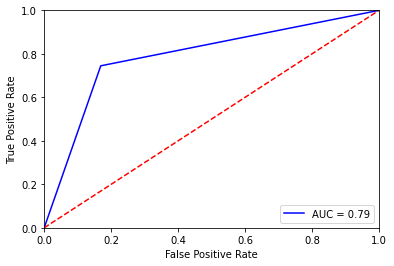

In [622]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_p_new, y_predict)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [631]:
#Logistic regression for users whose payment_period = 0, the trial period 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

y_p0 =train_p0.pop('churn')
r=train_p0.pop('payment_period')
x_p0=train_p0

y_p0_new =vali_p0.pop('churn')
r=vali_p0.pop('payment_period')
x_p0_new=vali_p0

clf0 = LogisticRegression(random_state=0).fit(x_p0, y_p0)
y_predict = clf0.predict(x_p0_new)
roc_auc_score(y_p0_new, y_predict)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6235142991701603

In [656]:
c0=compute_reciprocals(clf0.coef_[0])
coef0=pd.DataFrame([list(x_p0.columns),c0])
coef0.transpose().sort_values(ascending=False, by=[1])

,0,1
15,expand regional access,0.976744
14,expand international access,0.975302
31,email_blast,0.927526
13,education,0.910496
53,base_uae_14_day_trial,0.886483
...,...,...
38,other,0.262645
1,num_ideal_streaming_services,0.253881
43,podcast,0.25371
7,comedy,0.238028


In [615]:
#Logistic regression for users whose payment_period = 1,2,3, the subscription period
y_p1 =train_p1.pop('churn')
r=train_p1.pop('payment_period')
x_p1=train_p1

y_p1_new =vali_p1.pop('churn')
r=vali_p1.pop('payment_period')
x_p1_new=vali_p1

clf1 = LogisticRegression(random_state=0).fit(x_p1, y_p1)
y_predict = clf1.predict(x_p1_new)
roc_auc_score(y_p1_new, y_predict)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6001359205213652

In [652]:
c1=compute_reciprocals(clf1.coef_[0])
coef1=pd.DataFrame([list(x_p1.columns),c1])
coef1.transpose().sort_values(ascending=False, by=[1])

,0,1
13,education,0.754142
31,email_blast,0.7434
14,expand international access,0.732257
15,expand regional access,0.705157
33,facebook_organic,0.704985
...,...,...
7,comedy,0.251909
1,num_ideal_streaming_services,0.250551
12,access to exclusive content,0.240055
6,enhanced,0.227338


In [671]:
#churn prediction for trial users
df_p02=df_p0.copy()
y_0=df_p02.pop('churn')
r=df_p02.pop('payment_period')
x_0=df_p02

y_predict = clf0.predict(x_0)
df_p0['churn_prediction']=y_predict

<ipython-input-671-7ac6bfb468a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p0['churn_prediction']=y_predict


In [672]:
df_p0['churn_prediction'].value_counts()

1    82311
0     2302
Name: churn_prediction, dtype: int64

In [673]:
churn=df_p0[df_p0['churn_prediction']==1]
accept = np.random.choice([0, 1], size=len(churn), p=[.7, .3])
churn['accept']=accept
churn['revenue']=churn['accept']*4.5141
churn['revenue'].sum()

<ipython-input-673-448f35a2a561>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['accept']=accept
<ipython-input-673-448f35a2a561>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['revenue']=churn['accept']*4.5141


112026.41970000001

In [675]:
not_churn=df_p0[df_p0['churn_prediction']==0]
r=not_churn.count()*4.7343
r

weekly_consumption_hour         10898.3586
num_ideal_streaming_services    10898.3586
age                             10898.3586
male_TF                         10898.3586
churn                           10898.3586
                                   ...    
low_eur_no_trial                10898.3586
low_gbp_14_day_trial            10898.3586
low_sar_no_trial                10898.3586
low_uae_no_trial                10898.3586
churn_prediction                10898.3586
Length: 66, dtype: float64

In [682]:
(112026+10898)/10898

11.279500825839603

In [664]:
#churn prediction for subscription users
df_p12=df_p1.copy()
y_1 =df_p12.pop('churn')
r=df_p12.pop('payment_period')
x_1=df_p12

y_predict = clf1.predict(x_1)
df_p1['churn_prediction']=y_predict

<ipython-input-664-6b0778b8dc90>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p1['churn_prediction']=y_predict


In [665]:
df_p1['churn_prediction'].value_counts()

0    104350
1      3303
Name: churn_prediction, dtype: int64

In [666]:
churn=df_p1[df_p1['churn_prediction']==1]
accept = np.random.choice([0, 1], size=len(churn), p=[.2, .8])
churn['accept']=accept
churn['revenue']=churn['accept']*4.5141
churn['revenue'].sum()

<ipython-input-666-4eae4ccd5f56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['accept']=accept
<ipython-input-666-4eae4ccd5f56>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['revenue']=churn['accept']*4.5141


11705.061300000001

In [668]:
not_churn=df_p1[df_p1['churn_prediction']==0]
r=not_churn.count()*4.7343
r

weekly_consumption_hour         494024.205
num_ideal_streaming_services    494024.205
age                             494024.205
male_TF                         494024.205
churn                           494024.205
                                   ...    
low_eur_no_trial                494024.205
low_gbp_14_day_trial            494024.205
low_sar_no_trial                494024.205
low_uae_no_trial                494024.205
churn_prediction                494024.205
Length: 66, dtype: float64

In [681]:
(11705+494024)/494024

1.023693180898094

In [657]:
#churn2 prediction for subscription users
df_p2=data_churn2.copy()
y_1 =df_p2.pop('churn')
r=df_p2.pop('payment_period')
x_1=df_p2

y_predict = clf.predict(x_1)
data_churn2['churn_prediction']=y_predict

In [658]:
data_churn2['churn_prediction'].value_counts()

0    109686
1     75003
Name: churn_prediction, dtype: int64

In [659]:
accept = np.random.choice([0, 1], size=10, p=[.2, .8])
accept 

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [662]:
not_churn=data_churn2[data_churn2['churn_prediction']==0]
r=not_churn.count()*4.7343
r

weekly_consumption_hour         519286.4298
num_ideal_streaming_services    519286.4298
age                             519286.4298
male_TF                         519286.4298
churn                           519286.4298
                                   ...     
low_eur_no_trial                519286.4298
low_gbp_14_day_trial            519286.4298
low_sar_no_trial                519286.4298
low_uae_no_trial                519286.4298
churn_prediction                519286.4298
Length: 66, dtype: float64

In [676]:
churn=data_churn2[data_churn2['churn_prediction']==1]
accept = np.random.choice([0, 1], size=len(churn), p=[.5, .5])
churn['accept']=accept
churn['revenue']=churn['accept']*4.5141
churn['revenue'].sum()

<ipython-input-676-d8a34e524809>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['accept']=accept
<ipython-input-676-d8a34e524809>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['revenue']=churn['accept']*4.5141


169481.88450000001

In [680]:
(169481+519286)/519286

1.3263731354205581